# **The Battle of Neighborhoods**

### **Philadelphia, PA**

##### **Introduction/Business Problem:**

Flipping houses has become a popular hobby, as represented by the increase in TV shows on the topic focusing on various cities across the country. Extensive research is required in order to determine the best neighborhoods in a city that would provide the best "comps", which would lead to the best potential profit. During this research phase, various features of a neighborhood are considered such as median home prices, location to various venues (restaurants, parks, stores, etc.), school district ratings, and more. As to be expected, it is a tedious process to pull this information for individual neighborhoods and then to manually compare a specific neighborhood to another.

This project seeks to eliminate this inefficient process and replace it with an application that fetches all of these neighborhood features and provides a comparative analysis between neighborhoods being considered as potential areas of business. This would help stakeholders to make more insightful decisions about neighborhoods that offer the most potential for profit, as well as providing additional confidence from the comparative analysis versus the more tedious, manual process.

As an example, this project will fetch and analyze the neighborhood features for Philadelphia, PA. From there, two randomly selected neighborhoods from different clusters will be compared to show what the comparative analysis mentioned earlier would yield and which of the two would make for the better business location.

##### **Data:**

The Foursquare API will be used as the primary data source for this project. Postal Codes for various Philadelphia neighborhoods will be used to pull location data (longitude and latitude). HTTP requests will be made to the Foursquare API using this location data to pull information on nearby venues for each neighborhood. Due to request limitations, this project will only retrieve the top 100 venues for each neighborhood, and the radius parameter will be set to 500 meters.

Data visualization will be used for the comparative analysis of the two randomly selected neighborhoods. This will include interactive maps using the Folium package that will allow for exploration of the venues within each neighborhood. Also included will be various charts and graphs that plot additional features such as median home prices and school district ratings between the two neighborhoods. Conclusions will be drawn using these visualizations as to which neighborhood makes for a better business location.

##### **Python dependencies for this project:**

BeautifulSoup - Library for web scraping postal codes for Philadelphia neighborhoods  
Pandas - Library for data analysis  
NumPy - Library to handle data manipulation   
Sklearn - Library to handle k-mean clustering  
Requests - Library to handle http requests  
JSON - Library to handle JSON files  
Geopy - Library to pull location data  
Matplotlib - Library for data visualization  
Folium - Map rendering library  

In [69]:
# download dependencies
from bs4 import BeautifulSoup
import requests
import xml
import pandas as pd
import numpy as np

import json
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



**Get table of PostalCodes from file and group neighborhoods by PostalCode**

In [2]:
neighborhoods = pd.read_csv(r"Philly_PostalCodes.csv")
def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))

neighborhoods_group = neighborhoods.groupby(['PostalCode'])
neighborhoods_grouped = neighborhoods_group.apply(neighborhood_list).reset_index(name='Neighborhood')
neighborhoods_grouped.head(12)


,PostalCode,Neighborhood
0,19102,"Avenue of The Arts, Rittenhouse Square"
1,19103,"Avenue of The Arts, Fitler Square, Logan Squar..."
2,19104,"Belmont, Parkside, Powelton Village, Universit..."
3,19106,"Old City, Society Hill"
4,19107,"Avenue of The Arts, Chinatown, Midtown Village..."
5,19111,"Castor Gardens, Lawndale"
6,19112,Navy Yard
7,19114,Torresdale
8,19115,"Bustleton, Somerton"
9,19116,"Bustleton, Somerton"


In [3]:
neighborhoods_grouped.shape

(47, 2)

**Loop through and find coordinates for each neighborhood based on PostalCode**

In [4]:
latitude=[] #List to collect the latitudes
longitude=[] #List to collect the longitudes

geolocator = Nominatim()

for address in neighborhoods_grouped['PostalCode']: #Iterate through Postalcodes to collect the locations data
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    

neighborhoods_grouped['Latitude']=latitude #Add Latitude column into original dataframe 

neighborhoods_grouped['Longitude']=longitude #Add Longitude column into original dataframe
neighborhoods_grouped



/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


,PostalCode,Neighborhood,Latitude,Longitude
0,19102,"Avenue of The Arts, Rittenhouse Square",39.950468,-75.165929
1,19103,"Avenue of The Arts, Fitler Square, Logan Squar...",39.953398,-75.171475
2,19104,"Belmont, Parkside, Powelton Village, Universit...",39.955045,-75.182009
3,19106,"Old City, Society Hill",39.947500,-75.146213
4,19107,"Avenue of The Arts, Chinatown, Midtown Village...",39.953206,-75.165044
5,19111,"Castor Gardens, Lawndale",40.060532,-75.080584
6,19112,Navy Yard,39.892337,-75.172371
7,19114,Torresdale,40.060199,-75.012975
8,19115,"Bustleton, Somerton",40.095998,-75.042487
9,19116,"Bustleton, Somerton",40.116018,-75.018553


**Get coordinates of Philadelphia and generate map with Folium. Superimpose neighborhoods on top of map**

In [7]:
address = 'Philadelphia, PA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Philadelphia are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinates of Philadelphia are 39.9524152, -75.1635755.


In [8]:
# create map of Philadelphia using latitude and longitude values
map_philly = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, postalcode in zip(neighborhoods_grouped['Latitude'], neighborhoods_grouped['Longitude'], neighborhoods_grouped['Neighborhood'], neighborhoods_grouped['PostalCode']):
    label = '{}, {}'.format(postalcode, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_philly)  
    
map_philly

**Define Foursquare Credentials and Version**

In [9]:
CLIENT_ID = 'QCGHIAXHYRQ4CJRPGDV1NYTCSVBNHZNUVAE53QK1VFZNNVHI' # your Foursquare ID
CLIENT_SECRET = 'PXURTUKDL4FP4I30ESZQX4U4OC3BWVF33530LGMP1QKEFR4Z' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: QCGHIAXHYRQ4CJRPGDV1NYTCSVBNHZNUVAE53QK1VFZNNVHI
CLIENT_SECRET:PXURTUKDL4FP4I30ESZQX4U4OC3BWVF33530LGMP1QKEFR4Z


**Explore top 100 venues in Philadelphia within a radius of 500 meters**

In [10]:
radius=500
LIMIT=100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=QCGHIAXHYRQ4CJRPGDV1NYTCSVBNHZNUVAE53QK1VFZNNVHI&client_secret=PXURTUKDL4FP4I30ESZQX4U4OC3BWVF33530LGMP1QKEFR4Z&ll=39.9524152,-75.1635755&v=20180605&radius=500&limit=100'

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c3dfee7351e3d77b172aca1'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Avenue of the Arts South',
  'headerFullLocation': 'Avenue of the Arts South, Philadelphia',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 234,
  'suggestedBounds': {'ne': {'lat': 39.9569152045, 'lng': -75.15771621059733},
   'sw': {'lat': 39.947915195499995, 'lng': -75.16943478940266}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bde0d566198c9b6c5cc12ff',
       'name': 'Dilworth Park',
       'location': {'address': '1 Penn Sq',
        'crossStreet': 'West Side of City Hall',
        'lat': 39.95277184634

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Dilworth Park,Park,39.952772,-75.164723
1,La Colombe Coffee Roasters,Coffee Shop,39.951659,-75.165238
2,Fogo De Chão,Churrascaria,39.950877,-75.163052
3,City Hall Courtyard,Plaza,39.952484,-75.163592
4,"The Ritz-Carlton, Philadelphia",Hotel,39.951446,-75.164149


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
philly_venues = getNearbyVenues(names=neighborhoods_grouped['Neighborhood'],
                                   latitudes=neighborhoods_grouped['Latitude'],
                                   longitudes=neighborhoods_grouped['Longitude']
                                  )

Avenue of The Arts, Rittenhouse Square
Avenue of The Arts, Fitler Square, Logan Square, Rittenhouse Square
Belmont, Parkside, Powelton Village, University City
Old City, Society Hill
Avenue of The Arts, Chinatown, Midtown Village, Washington Square West,
Castor Gardens, Lawndale
Navy Yard
Torresdale
Bustleton, Somerton
Bustleton, Somerton
Chestnut Hill
Mount Airy
Logan, Olney
Brewerytown
Jinogi, Old Kensington, Yorktown
Loft District, Northern Liberties
Feltonville, Frankford, Juniata
Fishtown, Kensington
Oak Lane
Manayunk
Roxborough
East Falls
Art Museum, Francisville
Wynnefield
Strawberry Mansion
Fairhill, North Philadelphia
Port Richmond
Tacony
Holmsburg
Bridesburg
West Oak Lane
Walnut Hill/West
Hunting Park
Logan
Elmwood, Southwest Philadelphia
University City
Germantown
Passyunk
Graduate Hospital, Naval Square, Southwest Center City
Bella Vista, Italian Market, Pennsport, Queen Village
Pennsport, South Philadelphia, Whitman
Frankford
Cedarbrook
Overbrook, Overbrook Farms, Overbroo

**Check how many venues are in each neighborhood**

In [18]:
philly_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Art Museum, Francisville",47,47,47,47,47,47
"Avenue of The Arts, Chinatown, Midtown Village, Washington Square West,",100,100,100,100,100,100
"Avenue of The Arts, Fitler Square, Logan Square, Rittenhouse Square",100,100,100,100,100,100
"Avenue of The Arts, Rittenhouse Square",100,100,100,100,100,100
"Bella Vista, Italian Market, Pennsport, Queen Village",85,85,85,85,85,85
"Belmont, Parkside, Powelton Village, University City",34,34,34,34,34,34
Brewerytown,10,10,10,10,10,10
Bridesburg,14,14,14,14,14,14
"Bustleton, Somerton",11,11,11,11,11,11


**Analyze each neighborhood**

In [19]:
# one hot encoding
philly_onehot = pd.get_dummies(philly_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
philly_onehot['Neighborhood'] = philly_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [philly_onehot.columns[-1]] + list(philly_onehot.columns[:-1])
philly_onehot = philly_onehot[fixed_columns]

philly_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,"Avenue of The Arts, Rittenhouse Square",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Avenue of The Arts, Rittenhouse Square",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Avenue of The Arts, Rittenhouse Square",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Avenue of The Arts, Rittenhouse Square",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Avenue of The Arts, Rittenhouse Square",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Group rows by neighborhood and find means for each category**

In [20]:
philly_grouped = philly_onehot.groupby('Neighborhood').mean().reset_index()
philly_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,"Art Museum, Francisville",0.00,0.00,0.00,0.000000,0.000000,0.021277,0.00,0.000,0.021277,...,0.000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000
1,"Avenue of The Arts, Chinatown, Midtown Village...",0.01,0.00,0.00,0.000000,0.030000,0.000000,0.01,0.010,0.000000,...,0.000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000
2,"Avenue of The Arts, Fitler Square, Logan Squar...",0.00,0.00,0.00,0.000000,0.070000,0.000000,0.00,0.000,0.000000,...,0.000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.010000,0.010000,0.000000
3,"Avenue of The Arts, Rittenhouse Square",0.01,0.00,0.00,0.000000,0.030000,0.000000,0.00,0.010,0.010000,...,0.000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.040000,0.000000
4,"Bella Vista, Italian Market, Pennsport, Queen ...",0.00,0.00,0.00,0.000000,0.000000,0.023529,0.00,0.000,0.000000,...,0.000,0.011765,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Belmont, Parkside, Powelton Village, Universit...",0.00,0.00,0.00,0.000000,0.058824,0.000000,0.00,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Brewerytown,0.00,0.00,0.00,0.000000,0.000000,0.100000,0.00,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Bridesburg,0.00,0.00,0.00,0.000000,0.071429,0.000000,0.00,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,"Bustleton, Somerton",0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Castor Gardens, Lawndale",0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Print neighborhood along with 5 most common venues**

In [21]:
num_top_venues = 5

for hood in philly_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = philly_grouped[philly_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Art Museum, Francisville----
                  venue  freq
0          Liquor Store  0.06
1        Sandwich Place  0.06
2            Playground  0.06
3           Pizza Place  0.06
4  Gym / Fitness Center  0.06


----Avenue of The Arts, Chinatown, Midtown Village, Washington Square West,----
                 venue  freq
0          Coffee Shop  0.09
1                Hotel  0.04
2   Seafood Restaurant  0.04
3  American Restaurant  0.03
4       Cosmetics Shop  0.03


----Avenue of The Arts, Fitler Square, Logan Square, Rittenhouse Square----
                     venue  freq
0      American Restaurant  0.07
1              Coffee Shop  0.05
2                    Hotel  0.04
3  New American Restaurant  0.04
4              Salad Place  0.03


----Avenue of The Arts, Rittenhouse Square----
                     venue  freq
0              Coffee Shop  0.05
1              Yoga Studio  0.04
2           Clothing Store  0.04
3                    Hotel  0.04
4  New American Restaurant  0.03


----Be

**Let's put that into a pandas dataframe**

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Let's create the new dataframe and display the top 10 venues for each neighborhood**

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = philly_grouped['Neighborhood']

for ind in np.arange(philly_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(philly_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Art Museum, Francisville",Pizza Place,Italian Restaurant,Playground,Liquor Store,Gym / Fitness Center,Sandwich Place,Gastropub,Café,Japanese Restaurant,Dive Bar
1,"Avenue of The Arts, Chinatown, Midtown Village...",Coffee Shop,Seafood Restaurant,Hotel,Salad Place,Cosmetics Shop,American Restaurant,Plaza,Steakhouse,Park,Pizza Place
2,"Avenue of The Arts, Fitler Square, Logan Squar...",American Restaurant,Coffee Shop,New American Restaurant,Hotel,Salad Place,Deli / Bodega,Vegetarian / Vegan Restaurant,Clothing Store,Food Truck,Japanese Restaurant
3,"Avenue of The Arts, Rittenhouse Square",Coffee Shop,Hotel,Yoga Studio,Clothing Store,Pizza Place,New American Restaurant,Seafood Restaurant,Cosmetics Shop,American Restaurant,Dessert Shop
4,"Bella Vista, Italian Market, Pennsport, Queen ...",Mexican Restaurant,Italian Restaurant,Coffee Shop,Pizza Place,Vietnamese Restaurant,Bar,Gourmet Shop,Seafood Restaurant,Sandwich Place,Taco Place
5,"Belmont, Parkside, Powelton Village, Universit...",Rental Car Location,Food Truck,American Restaurant,Trail,Pub,Sandwich Place,Café,Italian Restaurant,Snack Place,Supplement Shop
6,Brewerytown,Restaurant,Intersection,Moving Target,Southern / Soul Food Restaurant,Art Gallery,Park,Food,Athletics & Sports,Flea Market,Fast Food Restaurant
7,Bridesburg,Pizza Place,Bar,Pharmacy,Convenience Store,Sports Bar,Bus Station,Gas Station,Food & Drink Shop,Moving Target,American Restaurant
8,"Bustleton, Somerton",Chinese Restaurant,Spanish Restaurant,Grocery Store,Shopping Mall,Liquor Store,Fast Food Restaurant,Pharmacy,Donut Shop,Indian Restaurant,Spa
9,"Castor Gardens, Lawndale",Bar,Dance Studio,Donut Shop,Deli / Bodega,Italian Restaurant,Pharmacy,Fast Food Restaurant,Coffee Shop,Clothing Store,Chinese Restaurant


**Cluster the neighborhoods with k-means**

In [25]:
# set number of clusters
kclusters = 3

philly_grouped_clustering = philly_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(philly_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 0, 0, 0], dtype=int32)

**Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood**

In [37]:
philly_merged = neighborhoods_grouped[0:46]

# add clustering labels
philly_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
philly_merged = philly_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

philly_merged.head() # check the last columns!

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,19102,"Avenue of The Arts, Rittenhouse Square",39.950468,-75.165929,2,Coffee Shop,Hotel,Yoga Studio,Clothing Store,Pizza Place,New American Restaurant,Seafood Restaurant,Cosmetics Shop,American Restaurant,Dessert Shop
1,19103,"Avenue of The Arts, Fitler Square, Logan Squar...",39.953398,-75.171475,2,American Restaurant,Coffee Shop,New American Restaurant,Hotel,Salad Place,Deli / Bodega,Vegetarian / Vegan Restaurant,Clothing Store,Food Truck,Japanese Restaurant
2,19104,"Belmont, Parkside, Powelton Village, Universit...",39.955045,-75.182009,2,Rental Car Location,Food Truck,American Restaurant,Trail,Pub,Sandwich Place,Café,Italian Restaurant,Snack Place,Supplement Shop
3,19106,"Old City, Society Hill",39.947500,-75.146213,2,History Museum,Historic Site,Hotel,American Restaurant,Italian Restaurant,Bar,Gastropub,Gym / Fitness Center,New American Restaurant,Restaurant
4,19107,"Avenue of The Arts, Chinatown, Midtown Village...",39.953206,-75.165044,2,Coffee Shop,Seafood Restaurant,Hotel,Salad Place,Cosmetics Shop,American Restaurant,Plaza,Steakhouse,Park,Pizza Place


**Visualize the clusters**

In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(philly_merged['Latitude'], philly_merged['Longitude'], philly_merged['Neighborhood'], philly_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## **Examine Clusters**

Cluster 1

In [39]:
philly_merged.loc[philly_merged['Cluster Labels'] == 0, philly_merged.columns[[1] + list(range(5, philly_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Torresdale,Liquor Store,Frozen Yogurt Shop,Intersection,Wings Joint,Deli / Bodega,Dive Bar,Bar,Donut Shop,Bowling Alley,Pizza Place
8,"Bustleton, Somerton",Chinese Restaurant,Spanish Restaurant,Grocery Store,Shopping Mall,Liquor Store,Fast Food Restaurant,Pharmacy,Donut Shop,Indian Restaurant,Spa
9,"Bustleton, Somerton",Chinese Restaurant,Spanish Restaurant,Grocery Store,Shopping Mall,Liquor Store,Fast Food Restaurant,Pharmacy,Donut Shop,Indian Restaurant,Spa
14,"Jinogi, Old Kensington, Yorktown",Pizza Place,Train Station,Convenience Store,Deli / Bodega,Seafood Restaurant,Concert Hall,Sandwich Place,Café,Bank,Metro Station
15,"Loft District, Northern Liberties",Pharmacy,Donut Shop,Coffee Shop,Diner,Lounge,Intersection,Pizza Place,Dog Run,Breakfast Spot,Brewery
16,"Feltonville, Frankford, Juniata",Pawn Shop,Clothing Store,Discount Store,Bus Station,Donut Shop,Miscellaneous Shop,Pizza Place,Chinese Restaurant,Food Truck,Food Court
18,Oak Lane,Pizza Place,Locksmith,Donut Shop,Chinese Restaurant,Pharmacy,Plaza,Intersection,Food & Drink Shop,Food,Falafel Restaurant
21,East Falls,Café,Gym / Fitness Center,Pub,Donut Shop,Kitchen Supply Store,Rock Climbing Spot,Deli / Bodega,Intersection,Food Court,Food Truck
22,"Art Museum, Francisville",Pizza Place,Italian Restaurant,Playground,Liquor Store,Gym / Fitness Center,Sandwich Place,Gastropub,Café,Japanese Restaurant,Dive Bar
25,"Fairhill, North Philadelphia",Fast Food Restaurant,Intersection,Bank,Latin American Restaurant,Grocery Store,Shopping Mall,Pharmacy,Fried Chicken Joint,Discount Store,Donut Shop


Cluster 2

In [40]:
philly_merged.loc[philly_merged['Cluster Labels'] == 1, philly_merged.columns[[1] + list(range(5, philly_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
42,Cedarbrook,Basketball Court,Department Store,Park,Gift Shop,Shoe Store,Convenience Store,Athletics & Sports,Flower Shop,Fast Food Restaurant,Filipino Restaurant


Cluster 3

In [41]:
philly_merged.loc[philly_merged['Cluster Labels'] == 2, philly_merged.columns[[1] + list(range(5, philly_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Avenue of The Arts, Rittenhouse Square",Coffee Shop,Hotel,Yoga Studio,Clothing Store,Pizza Place,New American Restaurant,Seafood Restaurant,Cosmetics Shop,American Restaurant,Dessert Shop
1,"Avenue of The Arts, Fitler Square, Logan Squar...",American Restaurant,Coffee Shop,New American Restaurant,Hotel,Salad Place,Deli / Bodega,Vegetarian / Vegan Restaurant,Clothing Store,Food Truck,Japanese Restaurant
2,"Belmont, Parkside, Powelton Village, Universit...",Rental Car Location,Food Truck,American Restaurant,Trail,Pub,Sandwich Place,Café,Italian Restaurant,Snack Place,Supplement Shop
3,"Old City, Society Hill",History Museum,Historic Site,Hotel,American Restaurant,Italian Restaurant,Bar,Gastropub,Gym / Fitness Center,New American Restaurant,Restaurant
4,"Avenue of The Arts, Chinatown, Midtown Village...",Coffee Shop,Seafood Restaurant,Hotel,Salad Place,Cosmetics Shop,American Restaurant,Plaza,Steakhouse,Park,Pizza Place
5,"Castor Gardens, Lawndale",Bar,Dance Studio,Donut Shop,Deli / Bodega,Italian Restaurant,Pharmacy,Fast Food Restaurant,Coffee Shop,Clothing Store,Chinese Restaurant
6,Navy Yard,Yoga Studio,Pizza Place,Café,Food Truck,Coffee Shop,Hotel,Athletics & Sports,Bank,Event Space,English Restaurant
10,Chestnut Hill,Chinese Restaurant,Bakery,Japanese Restaurant,Hotel,Pharmacy,Farmers Market,Paper / Office Supplies Store,Smoke Shop,Diner,Yoga Studio
11,Mount Airy,Pharmacy,Train Station,Pizza Place,Coffee Shop,Chinese Restaurant,Mediterranean Restaurant,Bakery,Event Space,Supermarket,Gym
12,"Logan, Olney",Seafood Restaurant,Grocery Store,Gas Station,Chinese Restaurant,Pharmacy,Donut Shop,Cosmetics Shop,Pizza Place,Filipino Restaurant,Fast Food Restaurant


In [42]:
new_philly=philly_merged.set_index("Neighborhood",drop=True)
new_philly.head()

,PostalCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,
"Avenue of The Arts, Rittenhouse Square",19102,39.950468,-75.165929,2,Coffee Shop,Hotel,Yoga Studio,Clothing Store,Pizza Place,New American Restaurant,Seafood Restaurant,Cosmetics Shop,American Restaurant,Dessert Shop
"Avenue of The Arts, Fitler Square, Logan Square, Rittenhouse Square",19103,39.953398,-75.171475,2,American Restaurant,Coffee Shop,New American Restaurant,Hotel,Salad Place,Deli / Bodega,Vegetarian / Vegan Restaurant,Clothing Store,Food Truck,Japanese Restaurant
"Belmont, Parkside, Powelton Village, University City",19104,39.955045,-75.182009,2,Rental Car Location,Food Truck,American Restaurant,Trail,Pub,Sandwich Place,Café,Italian Restaurant,Snack Place,Supplement Shop
"Old City, Society Hill",19106,39.947500,-75.146213,2,History Museum,Historic Site,Hotel,American Restaurant,Italian Restaurant,Bar,Gastropub,Gym / Fitness Center,New American Restaurant,Restaurant
"Avenue of The Arts, Chinatown, Midtown Village, Washington Square West,",19107,39.953206,-75.165044,2,Coffee Shop,Seafood Restaurant,Hotel,Salad Place,Cosmetics Shop,American Restaurant,Plaza,Steakhouse,Park,Pizza Place


**Get school ratings and plot ratings across Philadelphia neighborhoods**

In [53]:
#Source:https://www.greatschools.org
philly_schoolratings=pd.DataFrame({"Neighborhood":neighborhoods_grouped["Neighborhood"],
                                      "Top School Rating":[7,8,8,9,10,10,8,8,0,0,0,0,7,0,0,0,6,0,0,7,10,6,6,9,5,0,0,4,0,7,7,0,8,8,0,10,9,6,6,8,9,9,6,7,0,8,6]})

In [54]:
philly_schoolratings.set_index('Neighborhood',inplace=True,drop=True)

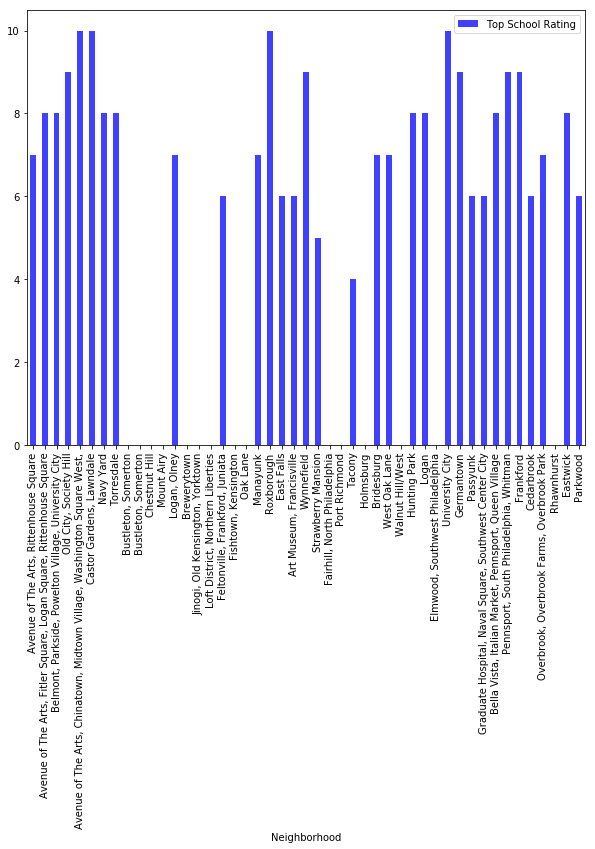

In [55]:
philly_schoolratings.plot(kind='bar',figsize=(10,8),color='blue',alpha=0.75);

**Get median home prices and plot prices across Philadelphia neighborhoods**

In [56]:
#Source:https://www.zillow.com
philly_homeprices=pd.DataFrame({"Neighborhood":neighborhoods_grouped["Neighborhood"],
                                      "Median Home Price":[192150.0,322500.0,277800.0,202000.0,273900.0,229200.0,198000.0,265000.0,245500.0,277000.0,269400.0,279800.0,215000.0,205000.0,205100.0,218000.0,220600.0,188000.0,210100.0,225100.0,199100.0,202000.0,202000.0,178200.0,225000.0,228000.0,175000.0,172200.0,290000.0,292200.0,275000.0,275200.0,272000.0,270000.0,220000.0,282200.0,269200.0,240000.0,212200.0,190100.0,225200.0,274900.0,275000.0,220000.0,190000.0,198500.0,210100.0]})

In [57]:
philly_homeprices.set_index('Neighborhood',inplace=True,drop=True)

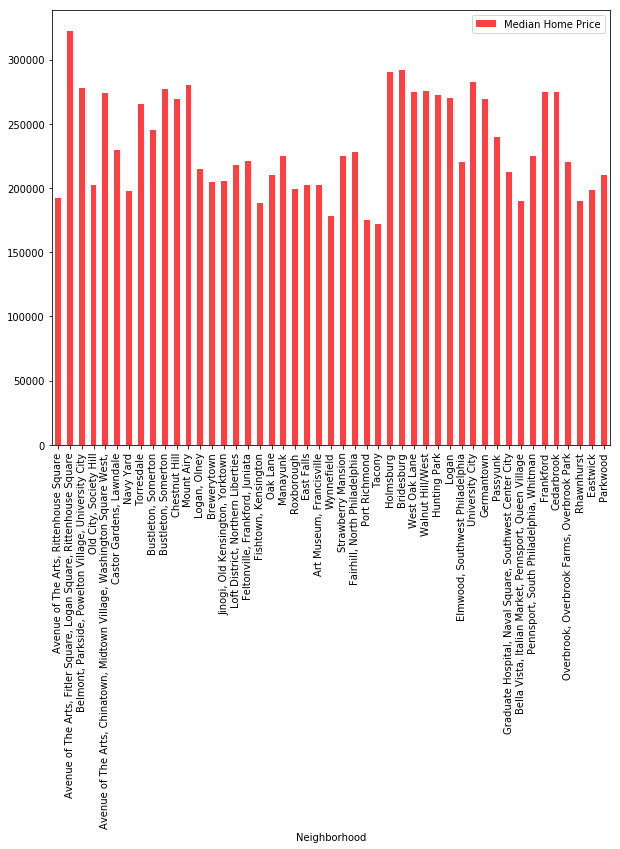

In [58]:
philly_homeprices.plot(kind='bar',figsize=(10,8),color='red',alpha=0.75);

**Now we can compare two neighborhoods to identify which one would provide greater potential profit for the stakeholders**

In [59]:
neighborhood1 = input("Please enter first neighborhood:")

Please enter first neighborhood: Manayunk


In [60]:
neighborhood2 = input("Please enter second neighborhood:")

Please enter second neighborhood: Germantown


In [61]:
Neighborhood_comp=new_philly.loc[[neighborhood1,neighborhood2]].T
Neighborhood_comp

Neighborhood,Manayunk,Germantown
PostalCode,19127,19144
Latitude,40.0271,40.0404
Longitude,-75.2236,-75.1586
Cluster Labels,2,0
1st Most Common Venue,Bar,Sandwich Place
2nd Most Common Venue,Bakery,Video Game Store
3rd Most Common Venue,New American Restaurant,Light Rail Station
4th Most Common Venue,Pizza Place,Mobile Phone Shop
5th Most Common Venue,Chinese Restaurant,American Restaurant
6th Most Common Venue,Italian Restaurant,Pharmacy


,Top School Rating
Neighborhood,
Manayunk,7
Germantown,9


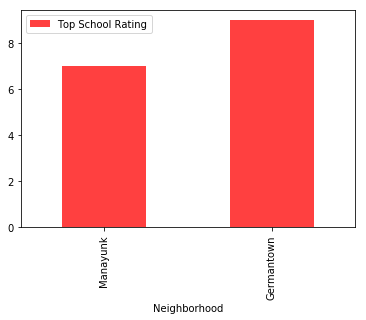

In [63]:
Schoolrating_comparison=philly_schoolratings.loc[[neighborhood1,neighborhood2]]
Schoolrating_comparison.plot(kind='bar', color='red', alpha=0.75);
Schoolrating_comparison

,Median Home Price
Neighborhood,
Manayunk,225100.0
Germantown,269200.0


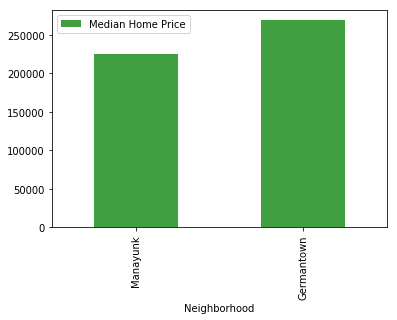

In [65]:
houseprice_comparison=philly_homeprices.loc[[neighborhood1,neighborhood2]]
houseprice_comparison.plot(kind='bar', color='green', alpha=0.75);
houseprice_comparison

## **Conclusion:**

Based on the tables and the outputs generated from this analysis, it is clear that Germantown is the more attractive neighborhood between the two. Manayunk may have more bars/restaurants, but Germantown provides additional venues like a pharmacy and access to the city via light rail, as well as boasting a higher school rating. The median home price is also higher in Germantown which opens the door to greater potential profit for stakeholders.